<a href="https://colab.research.google.com/github/gbneto65/trial_simul_cloud/blob/main/Copy_of_trial_simulator_cloud_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

789
########################### Trial Analyser ##########################

 Control group - mean:    1.6   std:  0.025
 Treatment group - mean:  1.58  std:  0.025

Nullity Hypothesis: There is no significant difference between groups ( P> 0.05 )
Student TTest for equal variances
Considering TWO TAILS TTest 

Likelihood to take the right decision (reject the null hypothesis when it is true - Type II error) :  78.9 %

######################################################################
Overview of the output
      Control  Probiotic     Delta   P value Reject HO
0    1.599435   1.581499  0.017936  0.027064      True
1    1.593788   1.565219  0.028569  0.000061      True
2    1.605162   1.580022  0.025140  0.000364      True
3    1.600735   1.581573  0.019162  0.004779      True
4    1.588774   1.580134  0.008640  0.293541     False
..        ...        ...       ...       ...       ...
995  1.593193   1.578967  0.014226  0.050878     False
996  1.601022   1.574753  0.026269  0.000041  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

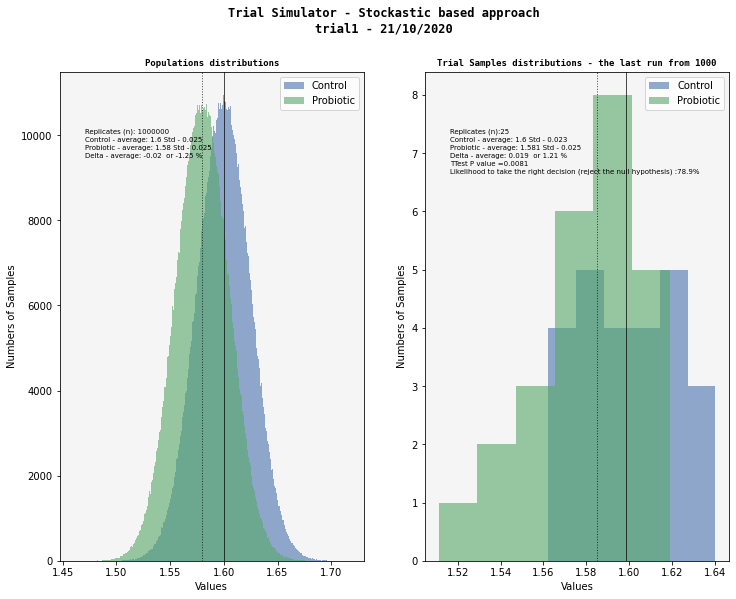

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
####################################
# Trial Simulator - V. beta 0.9 - Cloud based version
# based on 2 independend sample test - TTest for unequal variances
# assume a "Normal distribution" for all parameters
#
#
# Guilherme Borchardt - Chr-Hasen
# August, 5th, 2020 - original version
# August, 5th, 2020

# October, 21th, 2020 - cloud based version

# ###################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from scipy import stats
from matplotlib.gridspec import GridSpec
import time
import os
from google.colab import files



def cls(): # clean console function
    os.system('cls' if os.name == 'nt' else 'clear')

################################# INPUT TREATMENTS DESCRIPTION ########################################

case_name = 'trial1' # input a name for the Case - customer name, etc
treat1_name= 'Control' # input the name of treatment 1 (defaut = Control)
treat2_name= 'Probiotic' # input the name of treatment 2 (what is being tested)

################################### INPUT DATA HERE ###################################################

treatment1 = [1.6,
              .025,
              25,
              -.02] # average + std + num repetition + expected diff in comparison to mean

signif_p_value = 0.05 # p value to be considered significant
one_tail = False # False if is 2 tailed

#######################################################################################################

n = 1000  # num of trials to be repeated (ideal at least 500)
graph_dpi = 200

# treatment1
treat1_mean = treatment1[0]
treat1_sd = treatment1[1]
trial_rep = treatment1[2]
treat2_mean = treatment1[0]+treatment1[3]

# extended parameters



result =[]
todaysdate = time.strftime("%d/%m/%Y")

cls() # clear console

db_results = pd.DataFrame(columns=[treat1_name, treat2_name, 'Delta', 'P value', 'Reject HO'])  #creates a new dataframe that's empty

i = 1
counter = False
Result=[]

while i < n + 1:  # replicate trials

    rand_trat1 = np.random.normal(treat1_mean, treat1_sd, trial_rep) # random data
    rand_trat2 = np.random.normal(treat2_mean, treat1_sd, trial_rep)

    rand_trat1_mean = np.mean(rand_trat1)
    rand_trat2_mean = np.mean(rand_trat2)

    #   treat1_sample_mean = stat.mean(rand_trat1)
#   treat2_sample_mean = stat.mean(rand_trat2)
#   treat1_sample_sd = stat.stdev(rand_trat1)
#   treat2_sample_sd = stat.stdev(rand_trat2)

    ttest_out = stats.ttest_ind(rand_trat1, rand_trat2, equal_var= False) # perform ttest

    if one_tail == False:
        if ttest_out[1] <= signif_p_value :  # case two tails
            p_value = ttest_out[1]
            counter = True
        else:
            p_value = ttest_out[1]
            counter = False

    else: # case one_tail = True
        if ttest_out[1]  / 2 <= signif_p_value:
            p_value = ttest_out[1] / 2
            counter = True
        else:
            p_value = ttest_out[1] / 2
            counter = False


    df2 = {treat1_name: rand_trat1_mean, treat2_name: rand_trat2_mean,  'Delta': rand_trat1_mean-rand_trat2_mean, 'P value': p_value, 'Reject HO': counter}
    db_results = db_results.append(df2, ignore_index=True)
    result.append(counter)
    i += 1

#########################################################################
result_count_true = sum(result)
print(result_count_true)
print("########################### Trial Analyser ##########################")
print()
print(' Control group - mean:   ', treatment1[0], '  std: ', treatment1[1])
print(' Treatment group - mean: ', treatment1[0]+treatment1[3], ' std: ', treatment1[1])
print()
print('Nullity Hypothesis: There is no significant difference between groups ( P>',signif_p_value,')')
print('Student TTest for equal variances')
if one_tail == True:
    print("Considering ONE TAIL TTest")
else:
    print("Considering TWO TAILS TTest ")
print()
print('Likelihood to take the right decision (reject the null hypothesis when it is true - Type II error) : ', round(result_count_true/n*100,2), '%')
print()
print('######################################################################\n')
print('Overview of the output')
print(db_results)
print('a Excel file with complete the output will be downloaded \n')
print('\n guilherme borchardt - 2020')


pop_replicates = 100000
rand_trat_pop_control = np.random.normal(treat1_mean, treat1_sd, pop_replicates)  # random data
rand_trat_pop_treat = np.random.normal(treat2_mean, treat1_sd, pop_replicates)

delta_percent_pop = round((np.mean(rand_trat_pop_treat)- np.mean(rand_trat_pop_control)) / np.mean(rand_trat_pop_control) * 100,2)
delta_percent_sample = round((np.mean(rand_trat1)- np.mean(rand_trat2)) / np.mean(rand_trat1) * 100,2)
# charts
# ------------------------------------------
fig = plt.figure(figsize=(12, 9))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.7)
gs = GridSpec(nrows=1, ncols=2)
fig.suptitle('Trial Simulator - Stockastic based approach' +"\n"
             + case_name + ' - ' + todaysdate, fontsize=12, fontweight='bold', family='monospace')
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(rand_trat_pop_control, bins='auto', alpha=0.6, label= treat1_name)
ax1.hist(rand_trat_pop_treat, bins='auto', alpha=0.6, label= treat2_name)
ax1.legend(loc="upper right")
ax1.set_facecolor('whitesmoke')
ax1.axvline(np.median(rand_trat_pop_control), color='black', linestyle='solid', linewidth=1, alpha=.7)
ax1.axvline(np.median(rand_trat_pop_treat), color='black', linestyle='dotted', linewidth=1, alpha=.7)
ax1.set_title("Populations distributions", fontsize=9, fontweight='bold', family='monospace')
ax1.set_xlabel("Values", fontsize=10)
ax1.set_ylabel("Numbers of Samples", fontsize=10)
xmin1, xmax1, ymin1, ymax1 = ax1.axis()
ax1.text(xmin1+(xmax1-xmin1)/12, ymax1-(ymax1-ymin1)/8, 'Replicates (n): ' + str(pop_replicates), fontsize=7)
ax1.text(xmin1+(xmax1-xmin1)/12, ymax1-(ymax1-ymin1)/7, treat1_name+' - average: ' + str(round(np.mean(rand_trat_pop_control),3)) + ' Std - '+ str(round(np.std(rand_trat_pop_control),3)), fontsize=7)
ax1.text(xmin1+(xmax1-xmin1)/12, ymax1-(ymax1-ymin1)/6.3, treat2_name+' - average: ' + str(round(np.mean(rand_trat_pop_treat),3)) + ' Std - '+ str(round(np.std(rand_trat_pop_treat),3)), fontsize=7)
ax1.text(xmin1+(xmax1-xmin1)/12, ymax1-(ymax1-ymin1)/5.7, 'Delta - average: ' + str(round(np.mean(rand_trat_pop_treat)-np.mean(rand_trat_pop_control), 3)) + '  or '
                + str(delta_percent_pop) + ' %', fontsize=7)


ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(rand_trat1, bins='auto', alpha=0.6, label= treat1_name)
ax2.hist(rand_trat2, bins='auto', alpha=0.6, label= treat2_name)
ax2.set_facecolor('whitesmoke')
ax2.set_ylabel("Numbers of Samples", fontsize=10)
ax2.set_xlabel("Values", fontsize=10)
ax2.legend(loc="upper right")
ax2.set_title("Trial Samples distributions - the last run from " + str(n), fontsize=9, fontweight='bold', family='monospace')
ax2.axvline(np.median(rand_trat1), color='black', linestyle='solid', linewidth=1, alpha=.7)
ax2.axvline(np.median(rand_trat2), color='black', linestyle='dotted', linewidth=1, alpha=.7)
xmin2, xmax2, ymin2, ymax2 = ax2.axis()
ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/8, 'Replicates (n):'+str(treatment1[2]), fontsize=7)
ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/7, treat1_name+' - average: ' + str(round(np.mean(rand_trat1),3)) + ' Std - '+ str(round(np.std(rand_trat1),3)), fontsize=7)
ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/6.3, treat2_name+' - average: ' + str(round(np.mean(rand_trat2),3)) + ' Std - '+ str(round(np.std(rand_trat2),3)), fontsize=7)
ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/5.7, 'Delta - average: ' + str(round(np.mean(rand_trat1)-np.mean(rand_trat2),3))  + '  or '
                + str(delta_percent_sample) + ' %', fontsize=7)


ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/5.2, 'TTest P value =' + str(round(p_value,4)), fontsize=7)
ax2.text(xmin2+(xmax2-xmin2)/12, ymax2-(ymax2-ymin2)/4.8, 'Likelihood to take the right decision (reject the null hypothesis) :'+str(round(result_count_true/n*100,2)) + '%', fontsize=7)
plt.savefig('{}.png'.format(case_name),
            dpi=graph_dpi
            )
files.download('{}.png'.format(case_name))
plt.show()

# save database output to a excel file

db_results.to_excel('{}.xlsx'.format(case_name), sheet_name='trial_' + '0')
files.download('{}.xlsx'.format(case_name))


